<img src='./img/intel-logo.jpg' width=50%, Fig1> 

# OpenCV 기초강좌 

<font size=5><b>01. 이미지, 비디오 입출력 <b></font>

<div align='right'>성  민  석 (Minsuk  Sung)</div>
<div align='right'>류  회  성 (Hoesung Ryu)</div>

<img src='./img/OpenCV_Logo_with_text.png' width=20%, Fig2> 


---

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#이미지-읽기" data-toc-modified-id="이미지-읽기-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>이미지 읽기</a></span></li><li><span><a href="#Matplotlib을-이용해-이미지-시각화-하기" data-toc-modified-id="Matplotlib을-이용해-이미지-시각화-하기-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Matplotlib을 이용해 이미지 시각화 하기</a></span></li><li><span><a href="#이미지-저장하기" data-toc-modified-id="이미지-저장하기-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>이미지 저장하기</a></span></li><li><span><a href="#웹캠을-사용하여-비디오-읽기" data-toc-modified-id="웹캠을-사용하여-비디오-읽기-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>웹캠을 사용하여 비디오 읽기</a></span></li><li><span><a href="#영상-저장" data-toc-modified-id="영상-저장-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>영상 저장</a></span></li></ul></div>

## 이미지 읽기

`cv2.imread(file, flag)`

flag에 다양한 옵션을 주어 여러가지 형태로 불러 올 수 있습니다.

1. file :  저장위치


2. flag
 - cv2.IMREAD_ANYCOLOR: 원본 파일로 읽어옵니다. 
 - cv2.IMREAD_COLOR: 이미지 파일을 Color로 읽음. 투명한 부분은 무시하며 Default 설정입니다.
 - cv2.IMREAD_GRAYSCALE: 이미지 파일을 Grayscale로 읽음. 실제 이미지 처리시 중간 단계로 많이 사용합니다
 - cv2.IMREAD_UNCHAGED: 이미지 파일을 alpha channel 까지 포함해 읽음

In [1]:
import cv2

# 원본그대로 불러오기 
image = cv2.imread("./img/toy.jpg")

In [2]:
# 회색조로 불러오기 
img_gray = cv2.imread("./img/toy.jpg", cv2.IMREAD_GRAYSCALE)

## Matplotlib을 이용해 이미지 시각화 하기 

`jupyter notebook`에서 작업하는 경우 Matplotlib을 이용하여 시각화하는 방법을 추천합니다. 



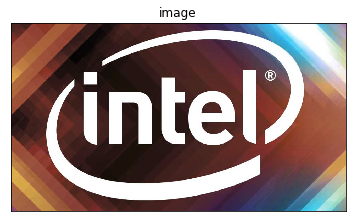

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt 

plt.title("image")
plt.imshow(image)
plt.xticks([]) # x축 눈금 없애기
plt.yticks([]) # y축 눈금 없애기 
plt.show()

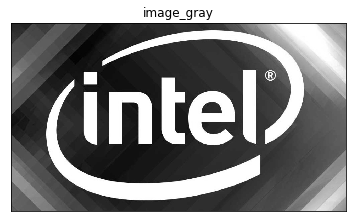

In [11]:
plt.title("image_gray")
plt.imshow(img_gray,cmap='gray')
plt.xticks([]) # x축 눈금 없애기
plt.yticks([]) # y축 눈금 없애기 
plt.show()

## 이미지 저장하기 

In [12]:
cv2.imwrite('./data/toy_image.jpg', image)
cv2.imwrite('./data/toy_gray_image.jpg', img_gray)

True

---

## 웹캠을 사용하여 비디오 읽기 

**`MAC_카탈리나` 환경에서는 창이 안닫히는 현상이 있으므로 실행하지 않는 것을 추천합니다.**  


- `cv2.VideoCapture()`: 캡쳐 객체를 생성 합니다. 소유하고 있는 웹캠의 갯수많큼 인덱스가 생기며 인덱스는 0부터 시작합니다. 예를들어, 웹캠을 하나만 가지고 있다면 0 을 입력합니다. `cv2.VideoCapture(0)`


- `ret, fram = cap.read()`: 비디오의 한 프레임씩 읽습니다. 제대로 프레임을 읽으면 ret값이 True, 실패하면 False가 나타납니다. fram에 읽은 프레임이 나옵니다
- `cv2.cvtColor()`: frame을 흑백으로 변환합니다
- `cap.release()`: 오픈한 캡쳐 객체를 해제합니다



In [ ]:
import cv2

OPTION = 'color' # gray: 흑백 


cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()    
    if ret:
        if OPTION == 'gray':
            gray = cv2.cvtColor(frame,  cv2.COLOR_BGR2GRAY)    # 입력 받은 화면 Gray로 변환
            cv2.imshow('frame_gray', gray)    # Gray 화면 출력
            if cv2.waitKey(1) == ord('q'): # q 를 누를시 정지 
                break
            
        elif OPTION == 'color':
            cv2.imshow('frame_color', frame)    # 컬러 화면 출력
            if cv2.waitKey(1) == ord('q'):
                break
    else:
        print('error')
        
cap.release()
cv2.destroyAllWindows()

## 영상 저장 

영상을 저장하기 위해서는 `cv2.VideoWriter` Object를 생성해야 합니다.

```

cv2.VideoWriter(outputFile, fourcc, frame, size)
영상을 저장하기 위한 Object

    Parameters:	
    outputFile (str) – 저장될 파일명
    fourcc – Codec정보. cv2.VideoWriter_fourcc()
    frame (float) – 초당 저장될 frame
    size (list) – 저장될 사이즈(ex; 640, 480)
```

- `cv2.VideoWriter(outputFile, fourcc, frame, size)` : fourcc는 코덱 정보, frame은 초당 저장될 프레임, size는 저장될 사이즈를 뜻합니다.

- `cv2.VideoWriter_fourcc('D','I','V','X')` 이런식으로소 사용하곤 합니다 적용 가능한 코덱은 DIVX, XVID, MJPG, X264, WMV1, WMV2 등이 있습니다

In [ ]:
import cv2

cap = cv2.VideoCapture(0)
fourcc = cv2.VideoWriter_fourcc(*'DIVX')
out = cv2.VideoWriter('./data/output.avi',
                      fourcc,
                      25.0,
                      (640, 480))

while (cap.isOpened()):
    ret, frame = cap.read()

    if ret:

        out.write(frame)

        cv2.imshow('frame', frame)

        if cv2.waitKey(0) & 0xFF == ord('q'):
            break
    else:
        break

cap.release()
out.release()
cv2.destroyAllWindows()